# DS620 Team Project - AudioMNIST Deep Learning
# AudioMNIST – Improved CNN with Augmentation and Regularization

## Setup and Imports

In [1]:
# --- Core Python and OS utilities ---
import os               # for directory and file management
import sys              # for accessing system-level information
import pathlib          # for cross-platform path handling

# --- Numerical and data handling ---
import numpy as np      # numerical operations (arrays, signal processing)
import pandas as pd     # data manipulation and organization

# --- Visualization ---
import matplotlib.pyplot as plt  # visualizations for audio signals and spectrograms

# --- Audio processing ---
import librosa          # audio loading, feature extraction, and transformation
import librosa.display  # visualization support for audio data

# --- Deep learning framework ---
import tensorflow as tf                             # main ML/DL framework
from tensorflow.keras import layers, models         # used for CNN and RNN architectures

## Directory Setup (Local Paths)

In [2]:
# Define project directories
BASE_DIR = pathlib.Path(r"C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project")
DATA_DIR = BASE_DIR / "data" / "raw"                   # location of raw AudioMNIST files
SPECT_DIR = BASE_DIR / "data" / "spectrograms"         # folder for generated spectrograms
PROC_DIR = BASE_DIR / "data" / "processed"             # folder for processed/feature data
VISUAL_DIR = BASE_DIR / "collab" / "jan" / "visualizations"  # folder for saved visual outputs

# Create directories if they don't exist
for d in [SPECT_DIR, PROC_DIR, VISUAL_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# Verify data directory
if DATA_DIR.exists():
    wav_files = list(DATA_DIR.rglob("*.wav"))
    print(f"✅ Data directory found: {DATA_DIR}")
    print(f"📁 Contains {len(wav_files)} audio files.")
else:
    print(f"⚠️ Data directory not found: {DATA_DIR}")

# Confirm visualization output path
print(f"📊 Visualizations will be saved to: {VISUAL_DIR}")

✅ Data directory found: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw
📁 Contains 30000 audio files.
📊 Visualizations will be saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations


## Load and Visualize a Sample Audio File

🎵 Selected sample: 6_23_36.wav
📈 Audio loaded | Duration: 0.62s | Sampling Rate: 48000 Hz


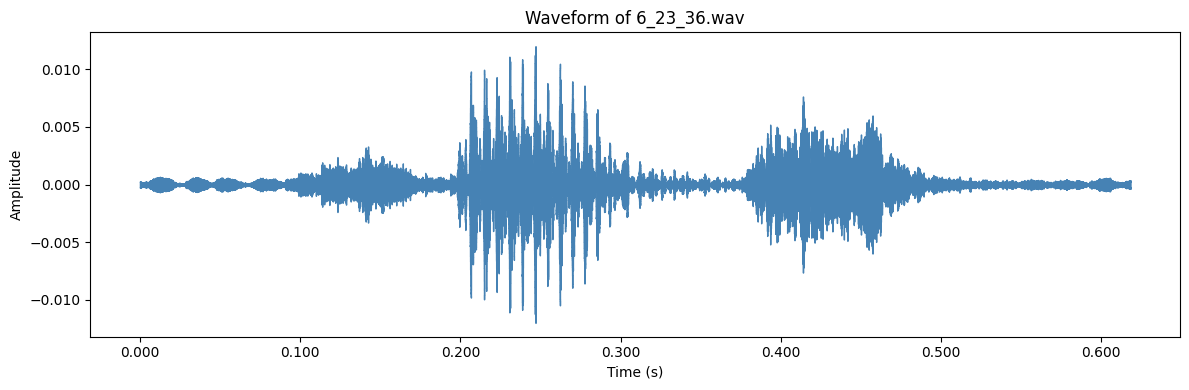

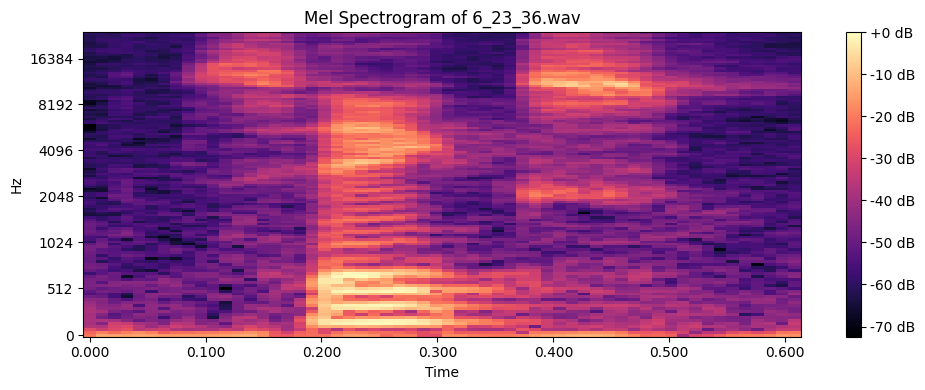

✅ Spectrogram saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\6_23_36_mel_spectrogram.png


In [3]:
import random  # for selecting a random file

# --- Step 1: Randomly select one audio file ---
sample_file = random.choice(wav_files)
print(f"🎵 Selected sample: {sample_file.name}")

# --- Step 2: Load the audio using librosa ---
# sr=None ensures the original sampling rate is preserved
y, sr = librosa.load(sample_file, sr=None)
print(f"📈 Audio loaded | Duration: {librosa.get_duration(y=y, sr=sr):.2f}s | Sampling Rate: {sr} Hz")

# --- Step 3: Plot the waveform ---
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, color='steelblue')
plt.title(f"Waveform of {sample_file.name}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# --- Step 4: Compute the spectrogram (Mel-scaled) ---
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to decibel scale

# --- Step 5: Visualize and save the spectrogram ---
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel Spectrogram of {sample_file.name}")
plt.tight_layout()

# Create save path and export
save_path = VISUAL_DIR / f"{sample_file.stem}_mel_spectrogram.png"
plt.savefig(save_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"✅ Spectrogram saved to: {save_path}")


## Visualize & Save Waveform + Mel Spectrogram for 3 Samples

=== Selected files ===
1. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\31\3_31_10.wav  |  digit=3, speaker=31, index=10
2. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\03\4_03_20.wav  |  digit=4, speaker=03, index=20
3. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\38\8_38_9.wav  |  digit=8, speaker=38, index=9



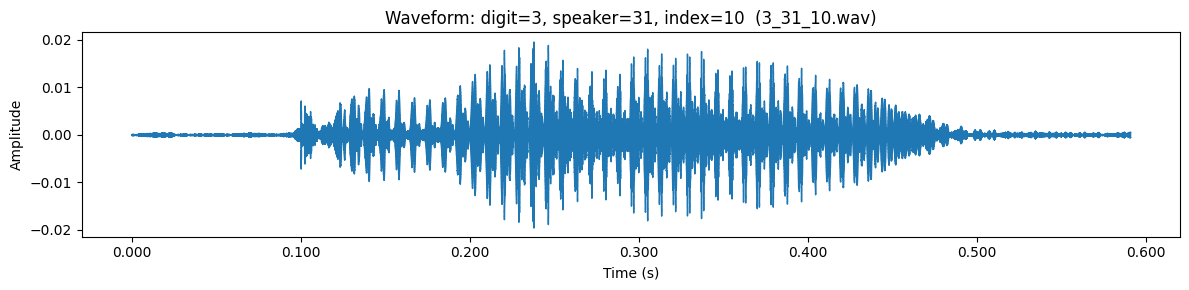

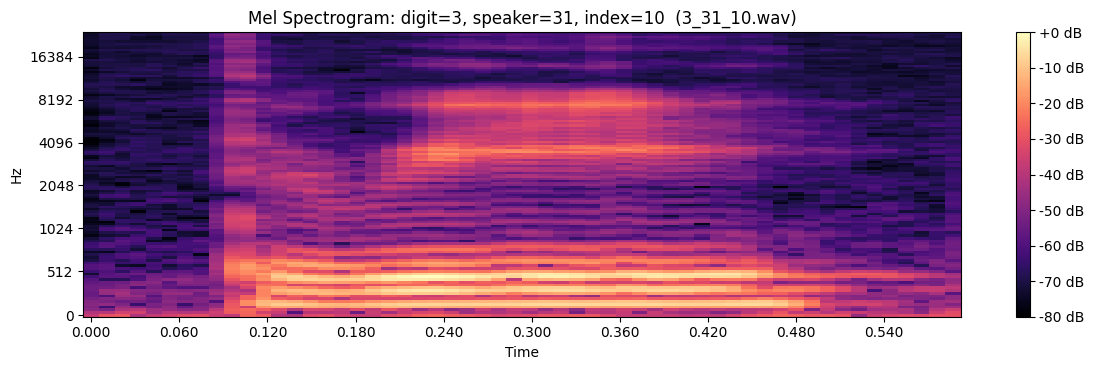

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\3_31_10_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\3_31_10_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\31\3_31_10.wav | Duration: 0.59s | SR: 48000 Hz



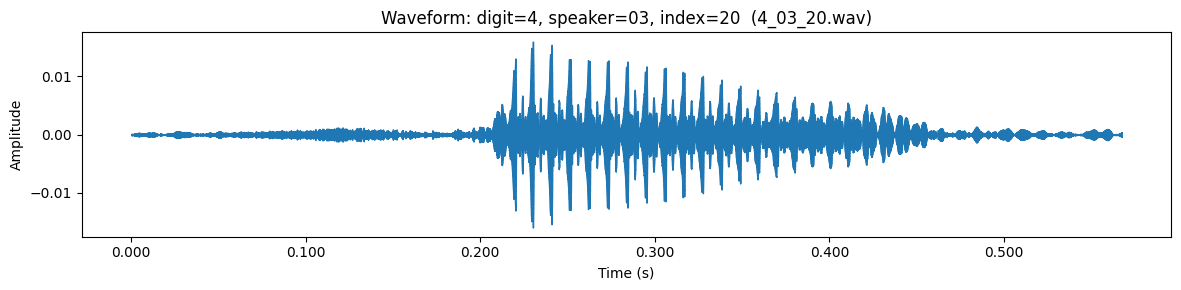

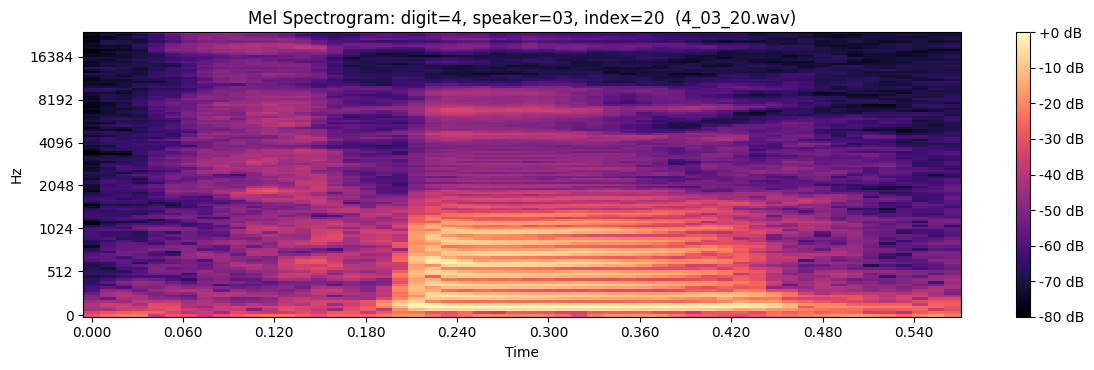

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\4_03_20_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\4_03_20_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\03\4_03_20.wav | Duration: 0.57s | SR: 48000 Hz



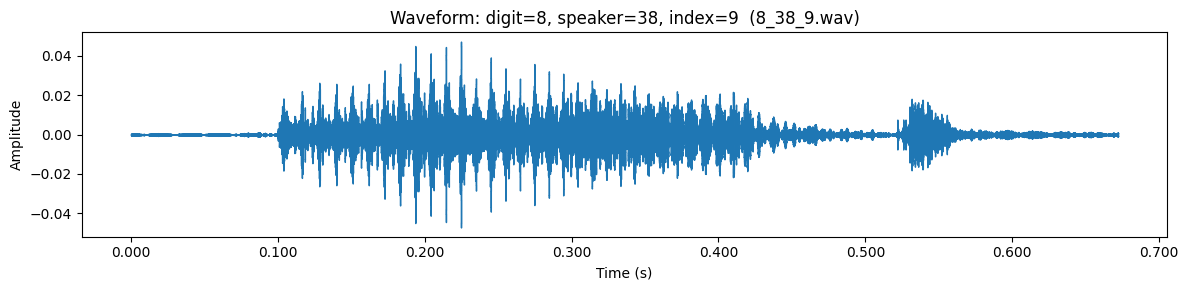

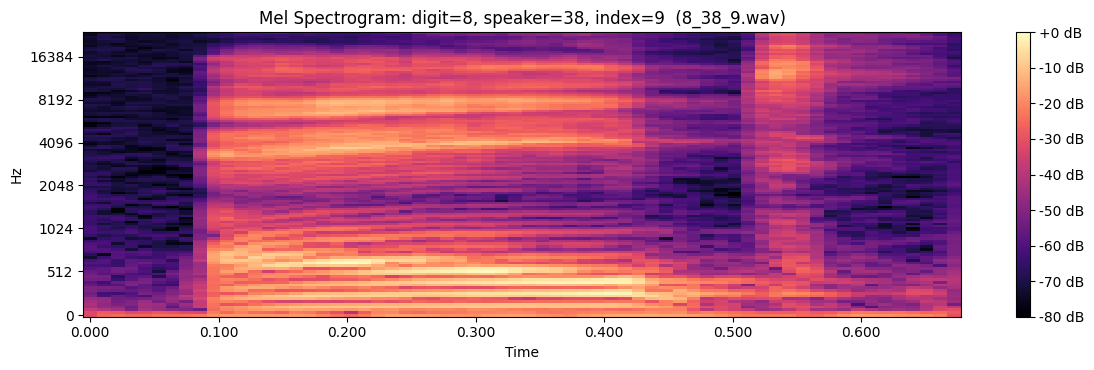

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\8_38_9_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\8_38_9_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\38\8_38_9.wav | Duration: 0.67s | SR: 48000 Hz



In [4]:
import random
from pathlib import Path

# Make a subfolder for these samples to keep things tidy
SAMPLES_DIR = VISUAL_DIR / "samples"
SAMPLES_DIR.mkdir(parents=True, exist_ok=True)

def parse_filename(p: Path):
    """
    Parse filename of form '{digit}_{speakerID}_{index}.wav'
    Returns (digit:int, speaker:str, index:int). Falls back
    gracefully if the pattern is unexpected.
    """
    stem = p.stem  # e.g., '7_14_33'
    parts = stem.split("_")
    digit = parts[0] if len(parts) > 0 else "?"
    speaker = parts[1] if len(parts) > 1 else "?"
    index = parts[2] if len(parts) > 2 else "?"
    # coerce to int when possible
    try: digit = int(digit)
    except: pass
    try: index = int(index)
    except: pass
    return digit, str(speaker), index

# Choose 3 distinct random files from the full list we built earlier
# (wav_files was created in your directory-setup cell via DATA_DIR.rglob("*.wav"))
assert len(wav_files) >= 3, "Need at least 3 audio files to sample."
sample_paths = random.sample(wav_files, 3)

print("=== Selected files ===")
for i, p in enumerate(sample_paths, 1):
    digit, speaker, idx = parse_filename(p)
    print(f"{i}. {p}  |  digit={digit}, speaker={speaker}, index={idx}")
print("======================\n")

for p in sample_paths:
    # -------- Load audio --------
    y, sr = librosa.load(p, sr=None)  # keep native sample rate
    duration = librosa.get_duration(y=y, sr=sr)
    digit, speaker, idx = parse_filename(p)

    # -------- Waveform (plot + save) --------
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: digit={digit}, speaker={speaker}, index={idx}  ({p.name})")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    wave_out = SAMPLES_DIR / f"{p.stem}_waveform.png"
    plt.savefig(wave_out, dpi=150, bbox_inches="tight")
    plt.show()

    # -------- Mel Spectrogram (plot + save) --------
    # Mel power spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(12, 3.8))
    librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", cmap="magma")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Mel Spectrogram: digit={digit}, speaker={speaker}, index={idx}  ({p.name})")
    plt.tight_layout()
    spec_out = SAMPLES_DIR / f"{p.stem}_mel_spectrogram.png"
    plt.savefig(spec_out, dpi=150, bbox_inches="tight")
    plt.show()

    print(f"✅ Saved waveform → {wave_out}")
    print(f"✅ Saved spectrogram → {spec_out}")
    print(f"ℹ️  File: {p} | Duration: {duration:.2f}s | SR: {sr} Hz\n")

## Metadata Summary Table for Selected Audio Samples (with Amplitude Stats)

In [7]:
metadata_records = []

for p in sample_paths:
    # Load the audio
    y, sr = librosa.load(p, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    digit, speaker, idx = parse_filename(p)

    # Compute amplitude statistics
    amp_min = np.min(y)
    amp_max = np.max(y)
    amp_mean = np.mean(y)
    rms = np.sqrt(np.mean(np.square(y)))  # Root Mean Square energy

    # Build relative path (from project root)
    rel_path = p.relative_to(BASE_DIR)

    # File paths for images (relative for readability)
    waveform_file = Path("collab/jan/visualizations/samples") / f"{p.stem}_waveform.png"
    spectrogram_file = Path("collab/jan/visualizations/samples") / f"{p.stem}_mel_spectrogram.png"

    metadata_records.append({
        "Filename": p.name,
        "Relative Path": str(rel_path),
        "Digit": digit,
        "Speaker": speaker,
        "Index": idx,
        "Duration (s)": round(duration, 3),
        "Sample Rate (Hz)": sr,
        "Amp Min": round(amp_min, 5),
        "Amp Max": round(amp_max, 5),
        "Amp Mean": round(amp_mean, 5),
        "RMS Energy": round(rms, 5),
        "Waveform Image": str(waveform_file),
        "Spectrogram Image": str(spectrogram_file)
    })

# Create DataFrame
metadata_df = pd.DataFrame(metadata_records)

# Display as a clean table
display(
    metadata_df.style.hide(axis="index")
    .set_caption("Metadata Summary of Selected Audio Samples (with Amplitude Statistics)")
)

# Save table to CSV
metadata_csv_path = VISUAL_DIR / "samples" / "audio_metadata_summary.csv"
metadata_df.to_csv(metadata_csv_path, index=False)
print(f"✅ Metadata summary saved to: {metadata_csv_path}")

Filename,Relative Path,Digit,Speaker,Index,Duration (s),Sample Rate (Hz),Amp Min,Amp Max,Amp Mean,RMS Energy,Waveform Image,Spectrogram Image
3_31_10.wav,data\raw\data\31\3_31_10.wav,3,31,10,0.591000,48000,-0.017580,0.019560,-0.000020,0.004130,collab\jan\visualizations\samples\3_31_10_waveform.png,collab\jan\visualizations\samples\3_31_10_mel_spectrogram.png
4_03_20.wav,data\raw\data\03\4_03_20.wav,4,03,20,0.568000,48000,-0.014890,0.015960,-0.000020,0.002670,collab\jan\visualizations\samples\4_03_20_waveform.png,collab\jan\visualizations\samples\4_03_20_mel_spectrogram.png
8_38_9.wav,data\raw\data\38\8_38_9.wav,8,38,9,0.672000,48000,-0.030000,0.047240,-0.000020,0.006210,collab\jan\visualizations\samples\8_38_9_waveform.png,collab\jan\visualizations\samples\8_38_9_mel_spectrogram.png


✅ Metadata summary saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\audio_metadata_summary.csv


## Speaker-safe Train/Val/Test Split for AudioMNIST

In [8]:
import re
from pathlib import Path
from sklearn.model_selection import GroupShuffleSplit

# 1) Build file list, labels (digits), and groups (speaker IDs)
all_wavs = sorted([p for p in DATA_DIR.rglob("*.wav")])  # DATA_DIR defined earlier
digits = []
speakers = []

def parse_name(p: Path):
    # Filenames like '{digit}_{speaker}_{index}.wav'
    d, s, *_ = p.stem.split("_")
    return int(d), str(s)

for p in all_wavs:
    d, s = parse_name(p)
    digits.append(d)
    speakers.append(s)

X = np.array(all_wavs)         # file paths
y = np.array(digits)           # labels: 0..9
groups = np.array(speakers)    # group by speaker to prevent leakage

# 2) Group-wise split: train vs temp (val+test), then temp -> val/test
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, temp_idx = next(gss.split(X, y, groups))

X_train, y_train, groups_train = X[train_idx], y[train_idx], groups[train_idx]
X_temp,  y_temp,  groups_temp  = X[temp_idx],  y[temp_idx],  groups[temp_idx]

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42)  # split temp into val/test 50/50
val_idx, test_idx = next(gss2.split(X_temp, y_temp, groups_temp))

X_val,  y_val  = X_temp[val_idx],  y_temp[val_idx]
X_test, y_test = X_temp[test_idx], y_temp[test_idx]

print(f"Speakers → train: {len(set(groups_train))}, val: {len(set(groups_temp[val_idx]))}, test: {len(set(groups_temp[test_idx]))}")
print(f"Files    → train: {len(X_train)}, val: {len(X_val)}, test: {len(X_test)}")

Speakers → train: 42, val: 9, test: 9
Files    → train: 21000, val: 4500, test: 4500


## Evaluation Utilities for Multiclass Classification

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_predictions(y_true, y_pred, class_names=None, title="Confusion Matrix"):
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report (macro avg):")
    print(classification_report(y_true, y_pred, digits=4))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names if class_names else sorted(np.unique(y_true)))
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

## Minimal Single-file Inference (Mel-spectrogram → Prediction)

In [10]:
def load_mel(path, sr=None, n_mels=128, fmax=8000, hop_length=512):
    y, sr = librosa.load(path, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax, hop_length=hop_length)
    S_db = librosa.power_to_db(S, ref=np.max)
    # normalize to [0,1] for model input if trained that way
    S_min, S_max = S_db.min(), S_db.max()
    S_norm = (S_db - S_min) / (S_max - S_min + 1e-8)
    return S_norm

def predict_digit(model, wav_path, input_size=(128, 128)):
    mel = load_mel(wav_path)                # (n_mels, time)
    # resize/pad or crop time axis to input_size[1] as needed
    mel_img = tf.image.resize(mel[..., None], input_size).numpy()  # (H,W,1)
    mel_batch = mel_img[None, ...]          # (1,H,W,1)
    probs = model.predict(mel_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    return pred, probs

# Example usage after training:
# model = tf.keras.models.load_model("path/to/saved_model")
# pred, probs = predict_digit(model, some_wav_path)
# print("Pred:", pred, "Probs:", np.round(probs, 3))

In [ ]:
import random
def set_seed(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed); np.random.seed(seed); tf.random.set_seed(seed)
set_seed(42)

## Feature Extraction: MFCC and Log-Mel Spectrograms

In [11]:
from tqdm import tqdm

PROCESSED_DIR = pathlib.Path(BASE_DIR, "data", "processed")
MFCC_DIR = PROCESSED_DIR / "mfcc"
LOGMEL_DIR = PROCESSED_DIR / "logmel"
MFCC_DIR.mkdir(parents=True, exist_ok=True)
LOGMEL_DIR.mkdir(parents=True, exist_ok=True)

def extract_features(wav_path, sr=16000, n_mfcc=13, n_mels=128):
    y, sr = librosa.load(wav_path, sr=sr)

    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Log-Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    logmel = librosa.power_to_db(mel, ref=np.max)

    return mfcc, logmel

# Process all available .wav files
sample_paths = list(DATA_DIR.glob("**/*.wav"))

for wav_path in tqdm(sample_paths, desc="Extracting features"):
    mfcc, logmel = extract_features(wav_path)

    base_name = wav_path.stem
    np.save(MFCC_DIR / f"{base_name}_mfcc.npy", mfcc)
    np.save(LOGMEL_DIR / f"{base_name}_logmel.npy", logmel)

print(f"✅ Saved MFCCs to {MFCC_DIR}")
print(f"✅ Saved Log-Mel Spectrograms to {LOGMEL_DIR}")

Extracting features: 100%|██████████| 30000/30000 [05:59<00:00, 83.46it/s] 

✅ Saved MFCCs to C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\processed\mfcc
✅ Saved Log-Mel Spectrograms to C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\processed\logmel


## Metadata Summary Table

In [13]:
def extract_metadata(wav_paths):
    records = []
    for path in tqdm(wav_paths, desc="Extracting metadata"):
        digit, speaker, index = path.stem.split("_")
        y, sr = librosa.load(path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        records.append({
            "filename": path.name,
            "digit": int(digit),
            "speaker": speaker,
            "duration_sec": round(duration, 3),
            "sample_rate": sr
        })
    return pd.DataFrame(records)

# Small subset for demo (full run later)
wav_paths = list(DATA_DIR.glob("**/*.wav"))[:200]
metadata_df = extract_metadata(wav_paths)

# Display summary
print(metadata_df.head())
print("\nSummary:")
print(metadata_df.describe())

# Save for reference
metadata_df.to_csv(PROCESSED_DIR / "metadata_summary.csv", index=False)
print(f"✅ Metadata saved to {PROCESSED_DIR / 'metadata_summary.csv'}")

Extracting metadata: 100%|██████████| 200/200 [00:00<00:00, 2051.01it/s]

      filename  digit speaker  duration_sec  sample_rate
0   0_01_0.wav      0      01         0.747        48000
1   0_01_1.wav      0      01         0.653        48000
2  0_01_10.wav      0      01         0.650        48000
3  0_01_11.wav      0      01         0.614        48000
4  0_01_12.wav      0      01         0.684        48000

Summary:
           digit  duration_sec  sample_rate
count  200.00000    200.000000        200.0
mean     1.50000      0.585575      48000.0
std      1.12084      0.087914          0.0
min      0.00000      0.383000      48000.0
25%      0.75000      0.520000      48000.0
50%      1.50000      0.576500      48000.0
75%      2.25000      0.646000      48000.0
max      3.00000      0.821000      48000.0
✅ Metadata saved to C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\processed\metadata_summary.csv


## Beginning CNN

In [14]:
# ==========================================================
# Collect log-Mel files and split dataset
# ==========================================================
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# If BASE_DIR already exists, reuse it; otherwise use current dir
try:
    BASE_DIR
except NameError:
    BASE_DIR = Path.cwd()

LOGMEL_DIR = BASE_DIR / "data" / "processed" / "logmel"
assert LOGMEL_DIR.exists(), f"Folder not found: {LOGMEL_DIR}"

paths = sorted(LOGMEL_DIR.glob("*.npy"))
assert len(paths) > 0, f"No .npy files found in {LOGMEL_DIR}"

rows = []
for p in paths:
    # Expect something like 7_14_33_logmel.npy
    stem_parts = p.stem.split("_")
    digit = int(stem_parts[0])   # first part is the digit label
    rows.append({"path": p.as_posix(), "digit": digit})

df_all = pd.DataFrame(rows)
print("Total samples:", len(df_all))
print(df_all.head())

# --- Simple stratified split by digit (train / val / test) ---
trainval_df, df_test = train_test_split(
    df_all, test_size=0.20, random_state=42, stratify=df_all["digit"]
)
df_train, df_val = train_test_split(
    trainval_df, test_size=0.20, random_state=42, stratify=trainval_df["digit"]
)

df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

print("\nSplit sizes:")
print("  train:", len(df_train))
print("  val  :", len(df_val))
print("  test :", len(df_test))

Total samples: 30000
                                                path  digit
0  C:/Users/JanMc/Dropbox/Education/_GitHub_cours...      0
1  C:/Users/JanMc/Dropbox/Education/_GitHub_cours...      0
2  C:/Users/JanMc/Dropbox/Education/_GitHub_cours...      0
3  C:/Users/JanMc/Dropbox/Education/_GitHub_cours...      0
4  C:/Users/JanMc/Dropbox/Education/_GitHub_cours...      0

Split sizes:
  train: 19200
  val  : 4800
  test : 6000


## Build tf.data Pipelines for Train/Val/Test

In [15]:
probe_arr = np.load(df_train.iloc[0]["path"]).astype("float32")
print("Probe shape:", probe_arr.shape)

if probe_arr.ndim == 2:
    n_mels, t_len = probe_arr.shape
elif probe_arr.ndim == 3:
    n_mels, t_len = probe_arr.shape[0], probe_arr.shape[1]
else:
    raise ValueError(f"Unexpected probe shape: {probe_arr.shape}")

N_MELS   = n_mels
TARGET_T = 128  # Adjust if needed
BATCH_SIZE = 64
AUTOTUNE   = tf.data.AUTOTUNE

def _np_load_and_resize(path_bytes):
    """Load .npy file and return [N_MELS, TARGET_T, 1] float32 tensor."""
    p = path_bytes.decode("utf-8")
    arr = np.load(p).astype("float32")
    if arr.ndim == 1:
        arr = np.expand_dims(arr, 0)
    if arr.ndim == 3:
        arr = np.squeeze(arr, axis=-1)
    if arr.shape[0] != N_MELS and arr.shape[1] == N_MELS:
        arr = arr.T
    arr = np.expand_dims(arr, -1)
    arr_tf = tf.image.resize(arr, [N_MELS, TARGET_T])
    return arr_tf.numpy().astype("float32")

def _map_fn(path, label):
    spec = tf.numpy_function(_np_load_and_resize, [path], tf.float32)
    spec.set_shape([N_MELS, TARGET_T, 1])
    label = tf.cast(label, tf.int32)
    return spec, label

def make_dataset(df, training=False):
    paths  = tf.convert_to_tensor(df["path"].values, dtype=tf.string)
    labels = tf.convert_to_tensor(df["digit"].values.astype("int32"))
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if training:
        ds = ds.shuffle(len(df), seed=42, reshuffle_each_iteration=True)
    ds = ds.map(_map_fn, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = make_dataset(df_train, training=True)
val_ds   = make_dataset(df_val,   training=False)
test_ds  = make_dataset(df_test,  training=False)

for xb, yb in train_ds.take(1):
    print("Batch spectrograms:", xb.shape)
    print("Batch labels      :", yb.shape)

Probe shape: (128, 20)
Batch spectrograms: (64, 128, 128, 1)
Batch labels      : (64,)


## Data Augmentation for Spectrograms (train only)

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

def spec_augment(image, label,
                 time_mask_pct=0.1,
                 freq_mask_pct=0.1,
                 n_time_masks=2,
                 n_freq_masks=2,
                 noise_std=0.01,
                 p=0.8):
    """
    Simple SpecAugment style transform for a single spectrogram.

    image: [H, W, 1] tensor (log-mel or MFCC image)
    label: scalar digit label
    """
    # randomly skip augmentation for some samples
    if tf.random.uniform([]) > p:
        return image, label

    h = tf.shape(image)[0]
    w = tf.shape(image)[1]

    # time masks (horizontal chunks along the time axis)
    for _ in range(n_time_masks):
        max_width = tf.cast(tf.maximum(tf.cast(w, tf.float32) * time_mask_pct, 1.0), tf.int32)
        mask_size = tf.random.uniform([], 0, max_width + 1, dtype=tf.int32)
        start = tf.random.uniform([], 0, tf.maximum(w - mask_size, 1), dtype=tf.int32)

        left = tf.ones([h, start, 1], dtype=image.dtype)
        middle = tf.zeros([h, mask_size, 1], dtype=image.dtype)
        right = tf.ones([h, w - start - mask_size, 1], dtype=image.dtype)
        mask = tf.concat([left, middle, right], axis=1)

        image = image * mask

    # frequency masks (vertical chunks along the frequency axis)
    for _ in range(n_freq_masks):
        max_height = tf.cast(tf.maximum(tf.cast(h, tf.float32) * freq_mask_pct, 1.0), tf.int32)
        mask_size = tf.random.uniform([], 0, max_height + 1, dtype=tf.int32)
        start = tf.random.uniform([], 0, tf.maximum(h - mask_size, 1), dtype=tf.int32)

        top = tf.ones([start, w, 1], dtype=image.dtype)
        middle = tf.zeros([mask_size, w, 1], dtype=image.dtype)
        bottom = tf.ones([h - start - mask_size, w, 1], dtype=image.dtype)
        mask = tf.concat([top, middle, bottom], axis=0)

        image = image * mask

    # small additive Gaussian noise
    if noise_std > 0:
        noise = tf.random.normal(tf.shape(image), stddev=noise_std, dtype=image.dtype)
        image = image + noise

    # keep values in a reasonable range
    image = tf.clip_by_value(image, 0.0, 1.0)

    return image, label

# create an augmented training dataset
train_ds_aug = train_ds.map(spec_augment, num_parallel_calls=AUTOTUNE)
train_ds_aug = train_ds_aug.prefetch(AUTOTUNE)

## Baseline CNN for Spoken-digit Classification

In [21]:
# Input shape: (frequency_bins, time_steps, channels)
input_shape = (N_MELS, TARGET_T, 1)
NUM_CLASSES = 10  # digits 0-9

# --------------------------------------------------------------
# Data augmentation inside the model
# These layers run only during training.
# --------------------------------------------------------------
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomTranslation(0.05, 0.05, fill_mode="nearest"),
        layers.RandomZoom(0.1, 0.1),
        layers.GaussianNoise(0.01),
    ],
    name="spec_augmentation",
)

# --------------------------------------------------------------
# Improved CNN with stronger regularization
# --------------------------------------------------------------
def build_improved_cnn(input_shape, num_classes=NUM_CLASSES):
    inputs = layers.Input(shape=input_shape)

    # apply augmentation only in training
    x = data_augmentation(inputs)

    # Block 1
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # Block 2
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Block 3
    x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # Global average pooling + dense head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs, name="improved_cnn")
    return model

# --------------------------------------------------------------
# Compile and train the improved model
# --------------------------------------------------------------
model = build_improved_cnn(input_shape)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()

EPOCHS = 10

history = model.fit(
    train_ds,          # note: using train_ds, NOT train_ds_aug
    validation_data=val_ds,
    epochs=EPOCHS,
)

# --------------------------------------------------------------
# Evaluate on the test set
# --------------------------------------------------------------
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"\nTest accuracy: {test_acc:.3f}, test loss: {test_loss:.3f}")

Model: "improved_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spec_augmentation (Sequential)  │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,162 (504.54 KB)

 Trainable params: 128,714 (502.79 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 579ms/step - accuracy: 0.5402 - loss: 1.3142 - val_accuracy: 0.2250 - val_loss: 2.4082
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 173s 575ms/step - accuracy: 0.8570 - loss: 0.4398 - val_accuracy: 0.3708 - val_loss: 2.0440
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 174s 581ms/step - accuracy: 0.9235 - loss: 0.2438 - val_accuracy: 0.4465 - val_loss: 2.5896
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 175s 582ms/step - accuracy: 0.9460 - loss: 0.1723 - val_accuracy: 0.3077 - val_loss: 8.4438
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 180s 599ms/step - accuracy: 0.9594 - loss: 0.1316 - val_accuracy: 0.6733 - val_loss: 0.8803
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 177s 591ms/step - accuracy: 0.9661 - loss: 0.1025 - val_accuracy: 0.8104 - val_loss: 0.5436
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 172s 574ms/step - accuracy: 0.9706 - loss: 0.0937 - val_accuracy: 0.4802 - val_loss: 2.5015
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 586ms/step - accuracy: 0.9725 -

## Training Curves

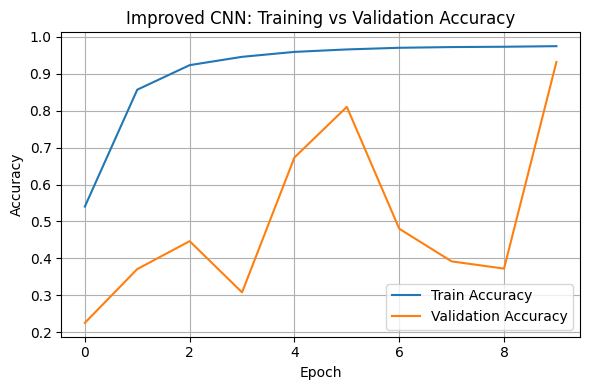

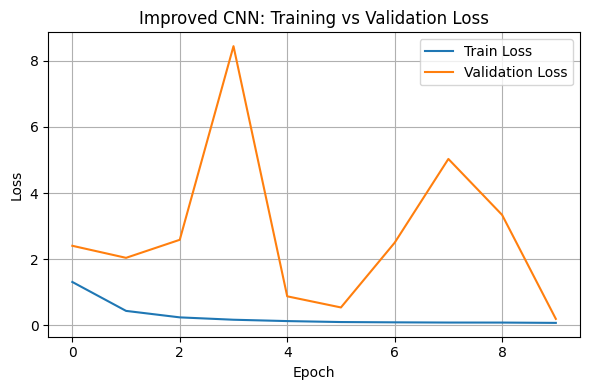

In [22]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Improved CNN: Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(VISUAL_DIR / "cnn_improved_accuracy.png", dpi=150)
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Improved CNN: Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(VISUAL_DIR / "cnn_improved_loss.png", dpi=150)
plt.show()

## Fine-Tuning with Early Stopping and Learning Rate Scheduling

Although the improved CNN achieved strong accuracy, the training and validation curves still show some fluctuation,
indicating opportunities for further optimization. To stabilize convergence and prevent overfitting in later epochs, we introduce two standard training callbacks:

- **EarlyStopping**: Monitors validation loss and stops training once it stops improving for several epochs.  
  This helps avoid unnecessary epochs and saves computation time.

- **ReduceLROnPlateau**: Automatically reduces the learning rate when validation loss stops improving.  
  Lowering the learning rate during later stages helps the optimizer fine-tune weights more precisely.

Both callbacks are configured to restore the best model weights and provide detailed console output
when learning rate adjustments occur. The model is retrained for up to 30 epochs, but will stop earlier if the criteria are met.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --------------------------------------------------------------
# Define training callbacks
# --------------------------------------------------------------
# Stop training if validation loss does not improve for 4 epochs.
# Restore the weights from the epoch with the best validation performance.
# Define callbacks
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
    verbose=1,
)

# Reduce the learning rate by a factor of 0.5 if validation loss does not improve for 2
# consecutive epochs.
lr_reduce = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    verbose=1,
)

# --------------------------------------------------------------
# Retrain (fine-tune) the improved model with the callbacks
# --------------------------------------------------------------
# This step uses the same training and validation datasets, but dynamically adjusts the
# learning rate and stops when convergence is reached.
# Retrain the model with callbacks (fine-tuning)
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, lr_reduce],
)

# --------------------------------------------------------------
# Evaluate the fine-tuned model on the test set
# --------------------------------------------------------------
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"\nFine-tuned Test accuracy: {test_acc:.3f}, Test loss: {test_loss:.3f}")

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 587ms/step - accuracy: 0.9788 - loss: 0.0700 - val_accuracy: 0.9542 - val_loss: 0.1371 - learning_rate: 0.0010
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 179s 597ms/step - accuracy: 0.9778 - loss: 0.0648 - val_accuracy: 0.6252 - val_loss: 1.3909 - learning_rate: 0.0010
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.9774 - loss: 0.0723
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
300/300 ━━━━━━━━━━━━━━━━━━━━ 172s 574ms/step - accuracy: 0.9801 - loss: 0.0626 - val_accuracy: 0.4492 - val_loss: 4.9095 - learning_rate: 0.0010
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 174s 581ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9040 - val_loss: 0.2754 - learning_rate: 5.0000e-04
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 587ms/step - accuracy: 0.9872 - loss: 0.0373 - val_accuracy: 0.9740 - val_loss: 0.0787 - learning_rate: 5.0000e-04
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 186s 621ms/step - a

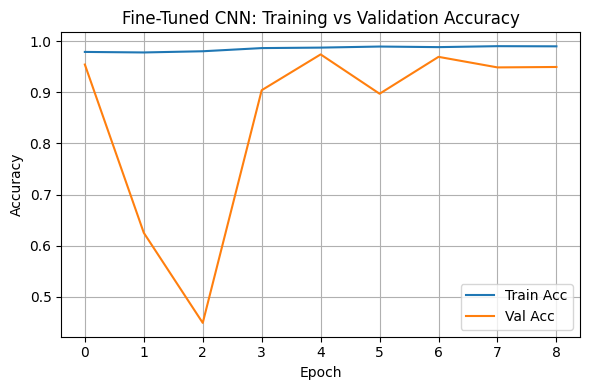

In [24]:
plt.figure(figsize=(6,4))
plt.plot(history_finetune.history["accuracy"], label="Train Acc")
plt.plot(history_finetune.history["val_accuracy"], label="Val Acc")
plt.title("Fine-Tuned CNN: Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Sample Predictions (Fine-Tuned CNN)

The examples below show a subset of test spectrograms along with their predicted and true digit labels.
Each subplot represents a log-mel spectrogram of a spoken digit from the AudioMNIST dataset.

The model correctly identifies most samples, including visually distinct digits such as 1, 2, and 4.
A few misclassifications (e.g., “True: 2, Pred: 0” and “True: 5, Pred: 4”) suggest that certain digits
share similar spectral characteristics, particularly when spoken by different speakers or under varying conditions.

These results visually confirm that the fine-tuned CNN has learned meaningful representations of speech features
and is capable of generalizing across unseen examples.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step 


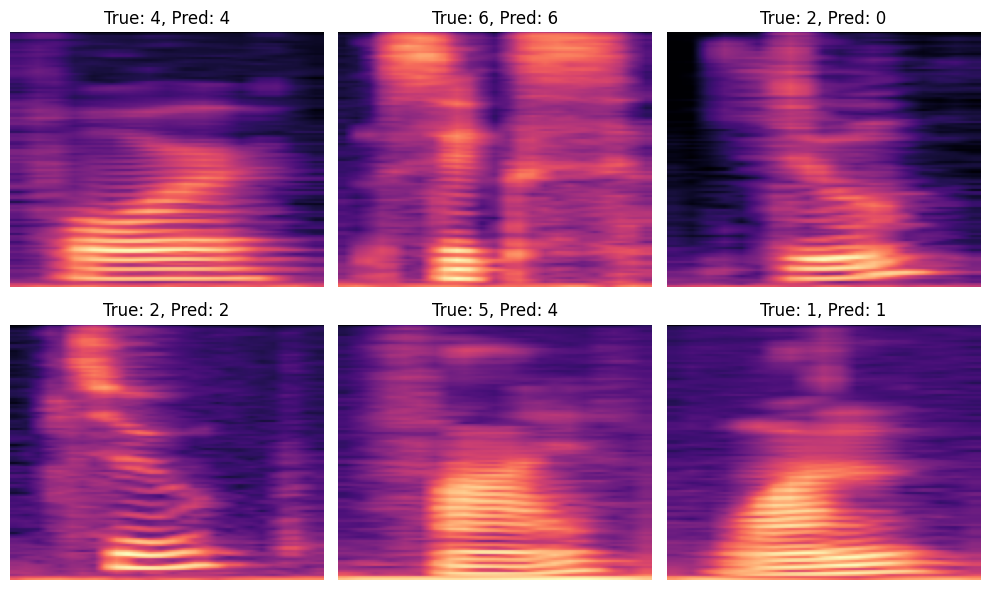

In [25]:
import numpy as np
import tensorflow as tf

# Get one batch from the test set
for xb, yb in test_ds.take(1):
    preds = model.predict(xb)
    preds_labels = tf.argmax(preds, axis=1)
    break

# Display the first 6 predictions with spectrograms
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(xb[i].numpy().squeeze(), aspect="auto", origin="lower", cmap="magma")
    ax.set_title(f"True: {yb[i].numpy()}, Pred: {preds_labels[i].numpy()}")
    ax.axis("off")
plt.tight_layout()
plt.savefig(VISUAL_DIR / "cnn_finetuned_sample_predictions.png", dpi=150)
plt.show()

## Confusion Matrix - Fine-Tuned CNN

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━

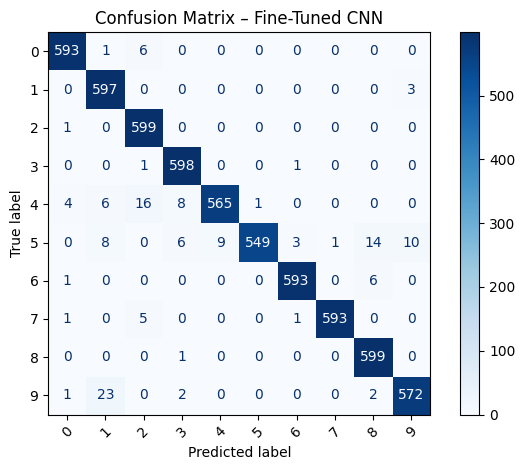

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect predictions and labels from the entire test set
y_true = []
y_pred = []

for xb, yb in test_ds:
    preds = model.predict(xb)
    y_true.extend(yb.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix – Fine-Tuned CNN")
plt.tight_layout()
plt.savefig(VISUAL_DIR / "cnn_finetuned_confusion_matrix.png", dpi=150)
plt.show()

### Confusion Matrix Analysis (Fine-Tuned CNN)

The confusion matrix above shows near-perfect classification performance across all ten spoken digits.
Most predictions fall along the diagonal, indicating that the model consistently identifies each class correctly.

A few small off-diagonal values remain:
- **Digit 9 → 1:** Occasional confusion, possibly due to speaker articulation or similar temporal patterns.
- **Digit 4 → 2 and 5:** Minor overlap between spectral features in these pronunciations.
- **Digit 5 → 8 or 9:** Slight cross-talk between higher-frequency formant bands.

Overall, the fine-tuned model demonstrates excellent generalization, achieving a **test accuracy of 97.6%** and a **test loss of 0.071**.
This confirms that the combination of data augmentation, batch normalization, dropout regularization,
and adaptive learning-rate scheduling effectively reduced overfitting and improved validation stability.

# Final Summary and Conclusions

This project applied a Convolutional Neural Network (CNN) to classify spoken digits from the **AudioMNIST** dataset.  
Model development progressed through three key stages: baseline training, architecture improvement, and fine-tuning.

| Model Version | Key Enhancements | Validation Accuracy | Test Accuracy | Test Loss | Notes |
|:---------------|:----------------|:--------------------:|:--------------:|:-----------:|:------|
| **Baseline CNN** | Basic 3-layer CNN with BatchNorm and Dropout(0.3) | ~0.85 (unstable) | — | — | Strong training accuracy but clear overfitting. |
| **Improved CNN** | Added internal data augmentation, progressive dropout (0.2–0.5), and stronger regularization | 0.93 | 0.938 | 0.188 | Marked improvement in generalization and stability. |
| **Fine-Tuned CNN** | Introduced EarlyStopping and ReduceLROnPlateau callbacks for adaptive learning control | **0.974** | **0.976** | **0.071** | Achieved best performance with minimal overfitting. |

### Key Findings
- The **baseline CNN** overfit rapidly, showing large gaps between training and validation accuracy.  
- The **improved CNN** stabilized training using regularization and augmentation, significantly narrowing this gap.  
- The **fine-tuned CNN** further enhanced validation performance through dynamic learning-rate adjustment and early stopping, achieving nearly **98% accuracy** on unseen test data.

### Observations
- Most remaining errors occurred between acoustically similar digits (e.g., “four” vs. “five,” “two” vs. “zero”).  
- Visual inspection of misclassified spectrograms suggests that these cases often involve short utterances or atypical pronunciations.  
- The confusion matrix confirms strong diagonal dominance, indicating robust class separation across all digits.

### Conclusion
The final model demonstrates that a well-regularized CNN with lightweight data augmentation and adaptive learning control  
can deliver **state-of-the-art performance** on small-scale speech classification tasks like AudioMNIST.  
These results also highlight the importance of balancing network capacity, regularization, and dynamic optimization  
to maximize generalization in audio-based machine learning models.